In [2]:
!nvidia-smi

Thu Jun 27 12:42:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              27W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [4]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 29.34 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/kaggle/working/yolov9


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [5]:
!pip install -q roboflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [6]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [7]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Jun 27 12:42 .
drwxr-xr-x 5 root root      4096 Jun 27 12:42 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [8]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [9]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [10]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0 

detect: weights=['/kaggle/working/weights/gelan-c.pt'], source=/kaggle/working/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /kaggle/working/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 107.9ms
Speed: 1.7ms pre-process, 107.9ms inference, 431.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

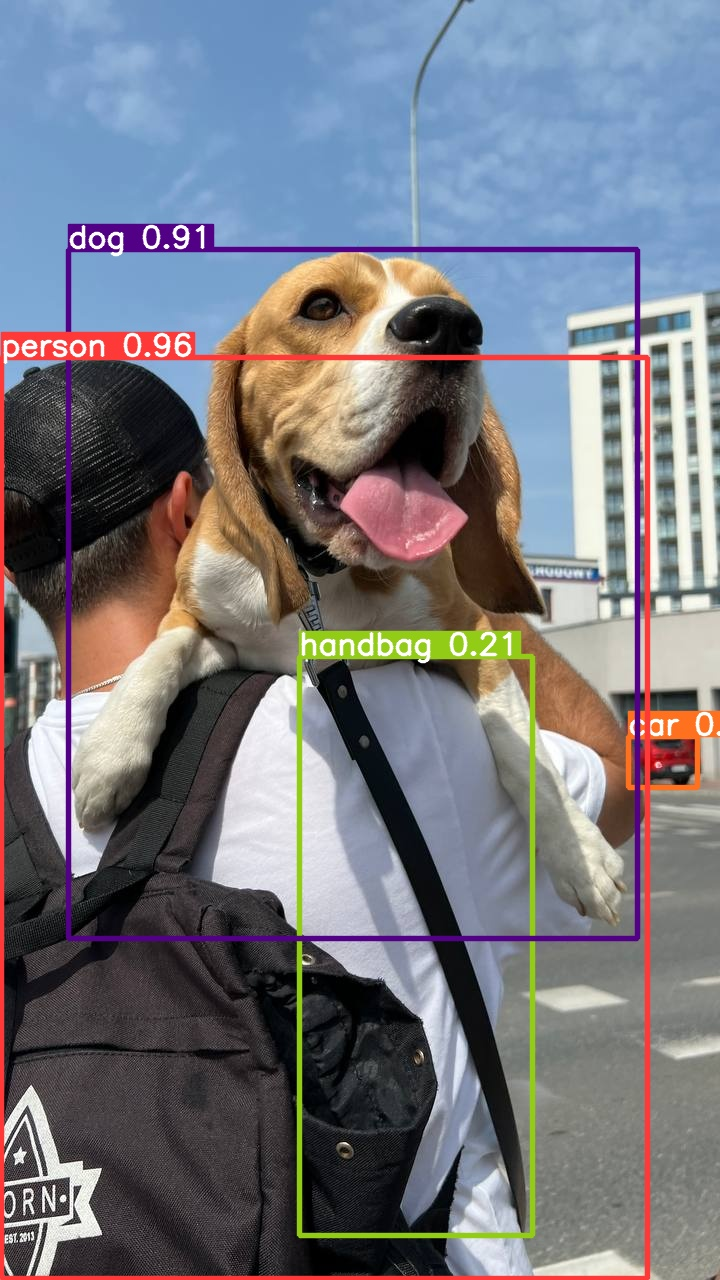

In [11]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## yolov9-e

In [12]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/kaggle/working/weights/yolov9-e.pt'], source=/kaggle/working/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /kaggle/working/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 133.6ms
Speed: 0.5ms pre-process, 133.6ms inference, 342.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


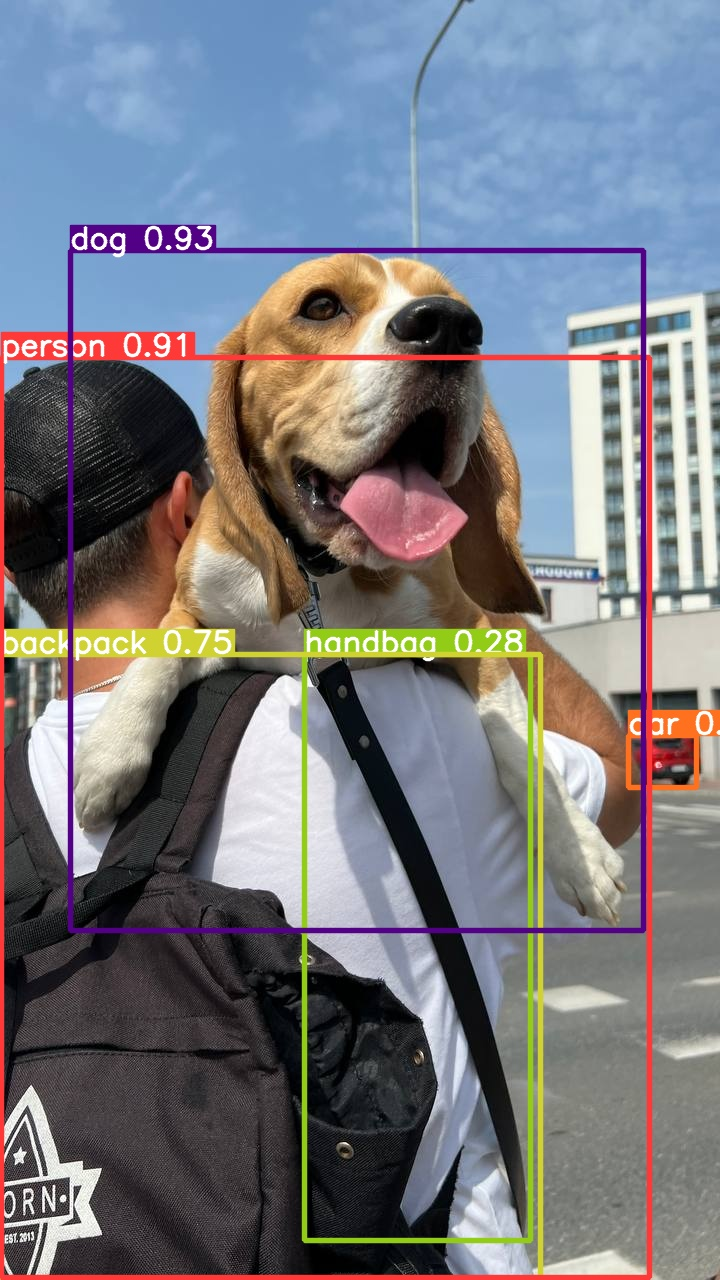

In [13]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [14]:
%cd {HOME}/yolov9

/kaggle/working/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [19]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(8)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.


Paste the authentication token here:  ····································


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-8 in yolov9:: 100%|██████████| 522/522 [00:00<00:00, 3358.67it/s]


## Train Custom Model

In [20]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/kaggle/working/yolov9
2024-06-27 12:48:01.628595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 12:48:01.628715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 12:48:01.781380: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=/kaggle/working/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/kaggle/working/yolov9/football-players-detection-8/data

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [28]:
!ls {HOME}/yolov9/runs/train/exp/

dog.jpeg


In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
# %cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt

## Inference with Custom Model

In [30]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/kaggle/working/yolov9/runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov9/football-players-detection-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/13 /kaggle/working/yolov9/football-players-detection-8/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 736x1280 1 ball, 22 players, 4 referees, 91.6ms
image 2/13 /kaggle/working/yolov9/football-players-detection-8/test/images/42ba34_1_5_png.rf.4337f

In [31]:
!ls {HOME}/yolov9/runs/detect/exp4

40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg
42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg
42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg
4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg
4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg
573e61_1_9_png.rf.e82af77d907cdc12dccbd6857f53b9b1.jpg
573e61_9_6_png.rf.fc52856b5974cb67862c25bae96f25ad.jpg
744b27_1_10_png.rf.e6f27d3b66a0c6720b9e9e50265251a6.jpg
744b27_7_4_png.rf.3431eaf3ff56847b5076376771bdf954.jpg
744b27_9_9_png.rf.b229c5eff4425a17d2f7e4b34cf7edd1.jpg
798b45_3_3_png.rf.f3a1db99742364b75a965df8ed33ba8f.jpg
a9f16c_2_10_png.rf.cf607320fc980b28b6e14b14fed46e91.jpg
a9f16c_2_9_png.rf.ee1080f3ec9bad6ba2b8ae4799f90b59.jpg


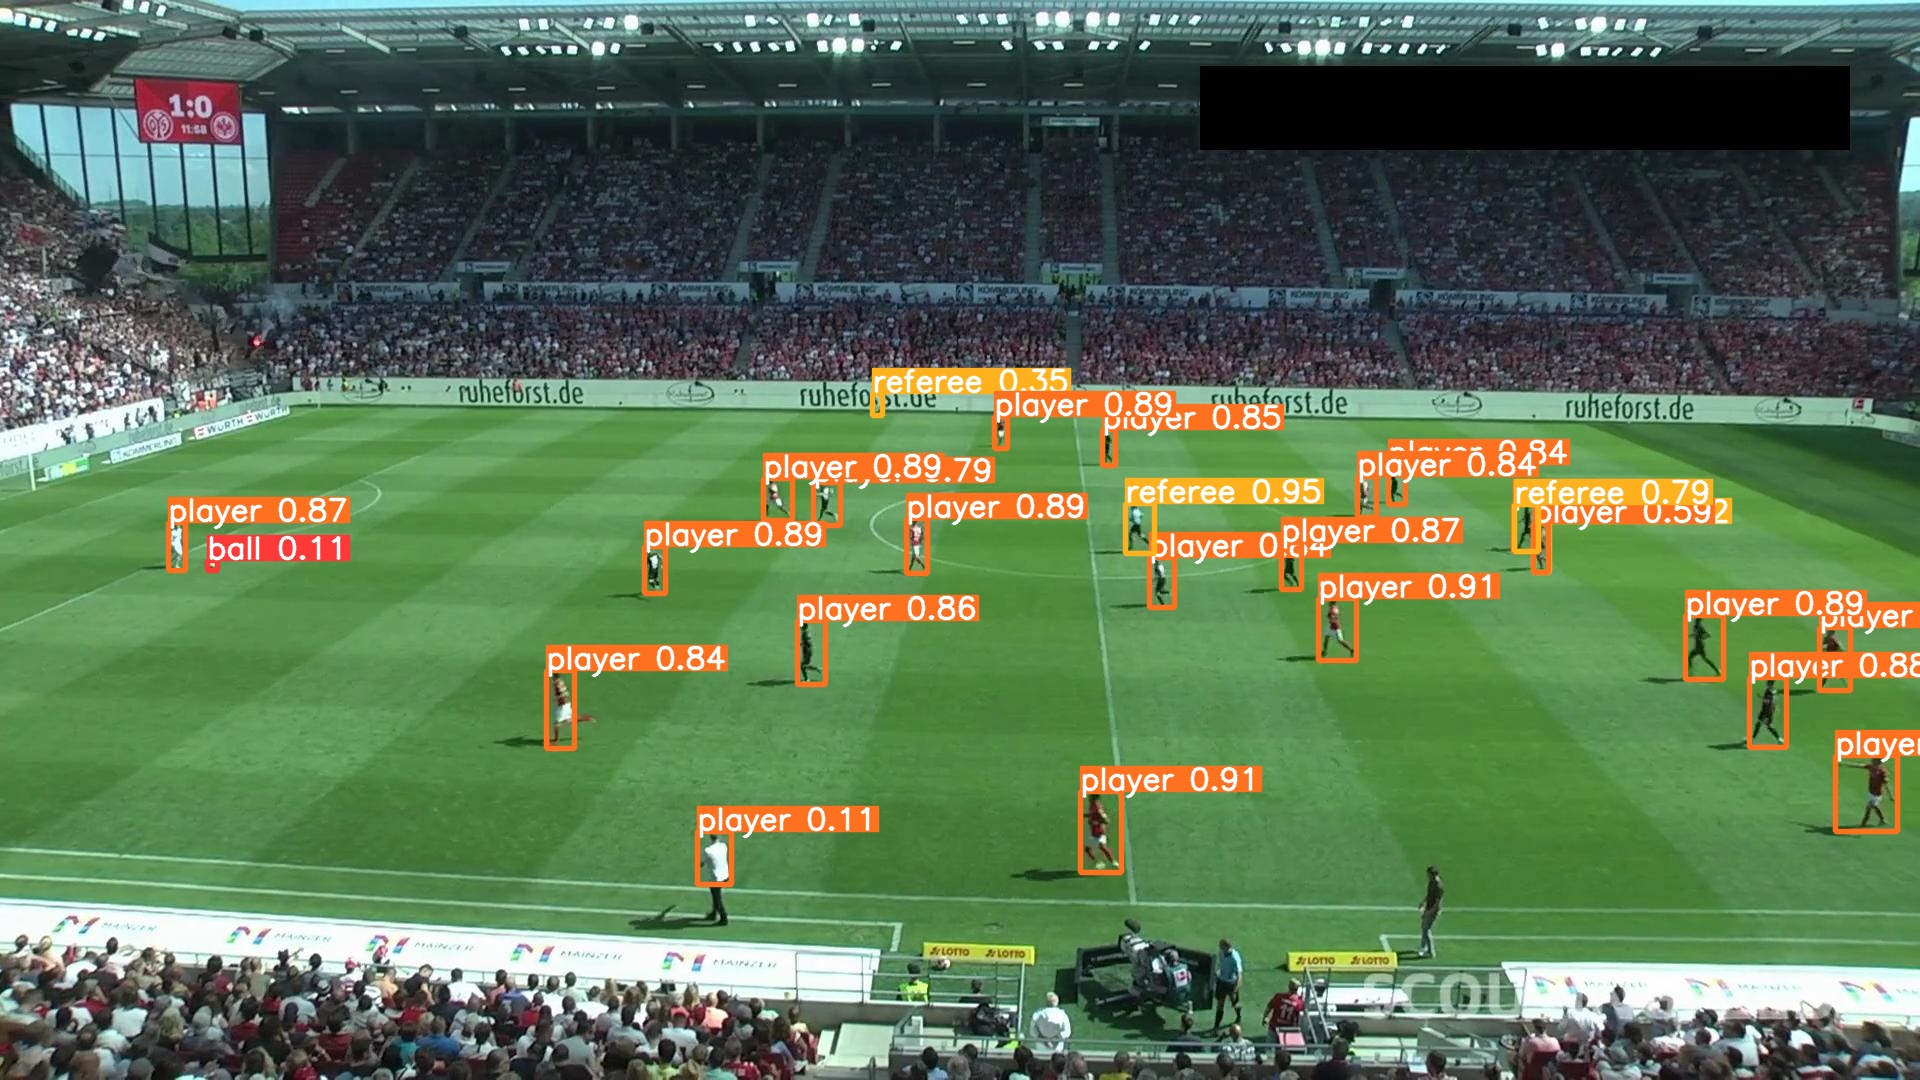

In [32]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp4/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg", width=600)

Save model to huggingface spaces app

In [23]:
from huggingface_hub import HfApi
api = HfApi()

In [24]:
from huggingface_hub import login
login()

In [73]:

api.upload_file(
    path_or_fileobj='model.pth',
    path_in_repo="base.pt",
    repo_id="Kartheekb7/s21-gpt3",
    repo_type="space",
)

yolov9-e.pt:   0%|          | 0.00/140M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/c5ba983941e8f71d6769fd5267b8ee65798baebd', commit_message='Upload base.pt with huggingface_hub', commit_description='', oid='c5ba983941e8f71d6769fd5267b8ee65798baebd', pr_url=None, pr_revision=None, pr_num=None)

In [25]:

api.upload_file(
    path_or_fileobj="/kaggle/working/yolov9/runs/train/exp/weights/best.pt",
    path_in_repo="best.pt",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

best.pt:   0%|          | 0.00/205M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/4d0992190b1de6215626f1e1fafd76097d55c271', commit_message='Upload best.pt with huggingface_hub', commit_description='', oid='4d0992190b1de6215626f1e1fafd76097d55c271', pr_url=None, pr_revision=None, pr_num=None)

In [31]:
api.upload_folder(
    folder_path="/content/yolov9/football-players-detection-8",
    path_in_repo="data", # Upload to a specific folder
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
    ignore_patterns="**/logs/*.txt", # Ignore all text logs
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/182af5eb5179ffcfd1f3ba42e135d742cd814239', commit_message='Upload folder using huggingface_hub', commit_description='', oid='182af5eb5179ffcfd1f3ba42e135d742cd814239', pr_url=None, pr_revision=None, pr_num=None)

In [69]:
api.upload_folder(
    folder_path="/content/yolov9/models",
    path_in_repo="models", # Upload to a specific folder
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
    ignore_patterns="**/logs/*.txt", # Ignore all text logs
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/8039cd3dd67a1dce0694412b7dcb6ed656814263', commit_message='Upload folder using huggingface_hub', commit_description='', oid='8039cd3dd67a1dce0694412b7dcb6ed656814263', pr_url=None, pr_revision=None, pr_num=None)

In [66]:
api.upload_folder(
    folder_path="/content/yolov9/utils",
    path_in_repo="utils", # Upload to a specific folder
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
    ignore_patterns="**/logs/*.txt", # Ignore all text logs
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/8da0dd19683053ee2f77d158a707c4cd258196f5', commit_message='Upload folder using huggingface_hub', commit_description='', oid='8da0dd19683053ee2f77d158a707c4cd258196f5', pr_url=None, pr_revision=None, pr_num=None)

In [32]:
api.upload_file(
    path_or_fileobj="/content/yolov9/requirements.txt",
    path_in_repo="requirements.txt",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/a529e2389416782971a31fc8da491e40a45cfceb', commit_message='Upload requirements.txt with huggingface_hub', commit_description='', oid='a529e2389416782971a31fc8da491e40a45cfceb', pr_url=None, pr_revision=None, pr_num=None)

In [68]:
api.upload_file(
    path_or_fileobj="/content/data/player.jpg",
    path_in_repo="player.jpg",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/3438c3afa16890d7515e286c18974171cb891f32', commit_message='Upload player.jpg with huggingface_hub', commit_description='', oid='3438c3afa16890d7515e286c18974171cb891f32', pr_url=None, pr_revision=None, pr_num=None)

In [67]:
api.upload_file(
    path_or_fileobj="/content/yolov9/detect.py",
    path_in_repo="detect.py",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/33dfbfb91f4c24185ee2d0f8ec50aae214d7c466', commit_message='Upload detect.py with huggingface_hub', commit_description='', oid='33dfbfb91f4c24185ee2d0f8ec50aae214d7c466', pr_url=None, pr_revision=None, pr_num=None)

In [74]:
api.upload_file(
    path_or_fileobj="/content/yolov9/export.py",
    path_in_repo="export.py",
    repo_id="Kartheekb7/yolo-s15",
    repo_type="space",
)

CommitInfo(commit_url='https://huggingface.co/spaces/Kartheekb7/yolo-s15/commit/0f24c2ac74568ec4402483f9cfc099ea7b40bb2a', commit_message='Upload export.py with huggingface_hub', commit_description='', oid='0f24c2ac74568ec4402483f9cfc099ea7b40bb2a', pr_url=None, pr_revision=None, pr_num=None)

In [30]:
!pip install -q gradio

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
distributed 2024.1.1 requires dask==2024.1.1, but you have dask 2024.5.2 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.
kfp 2.5.0 requires urllib3<2.0.0, but you have urllib3 2.2.2 which is incompatible.
rapids-dask-dependency 24.4.1a0 requires dask==2024.1.1, but you have dask 2024.5.2 which is incompatible.
rapids-dask-dependency 24.4.1a0 requires dask-expr==0.4.0, but you have dask-expr 1.1.2 which is incompatible.
spacy 3.7.3 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, bu

In [33]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="Kartheekb7/yolo-s15", filename="detect.py", repo_type="space")


detect.py:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

'/root/.cache/huggingface/hub/spaces--Kartheekb7--yolo-s15/snapshots/1258307947b76742c705fbe7e941784ad5056d3a/detect.py'